In [1]:
from sklearn.datasets import fetch_california_housing
house_dataset = fetch_california_housing()

In [3]:
house_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
import pandas as pd
data = pd.DataFrame(house_dataset.data, columns=house_dataset.feature_names)
target = pd.Series(house_dataset.target, name="MedPrice")

In [7]:
data.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target,
    test_size=0.2,
    random_state=42)

In [10]:
(data.shape, target.shape), (X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((20640, 8), (20640,)), ((16512, 8), (16512,)), ((4128, 8), (4128,)))

In [11]:
data.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [12]:
target.dtypes

dtype('float64')

In [13]:
data.nunique()

MedInc        12928
HouseAge         52
AveRooms      19392
AveBedrms     14233
Population     3888
AveOccup      18841
Latitude        862
Longitude       844
dtype: int64

In [14]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [15]:
train_data = X_train.copy()
train_data

print("\n-- check missing values in training data --\n{}".format(train_data.isnull().any()))
print("\n-- check missing values in test data --\n{}".format(X_test.isnull().any()))


-- check missing values in training data --
MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
dtype: bool

-- check missing values in test data --
MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
dtype: bool


<Axes: >

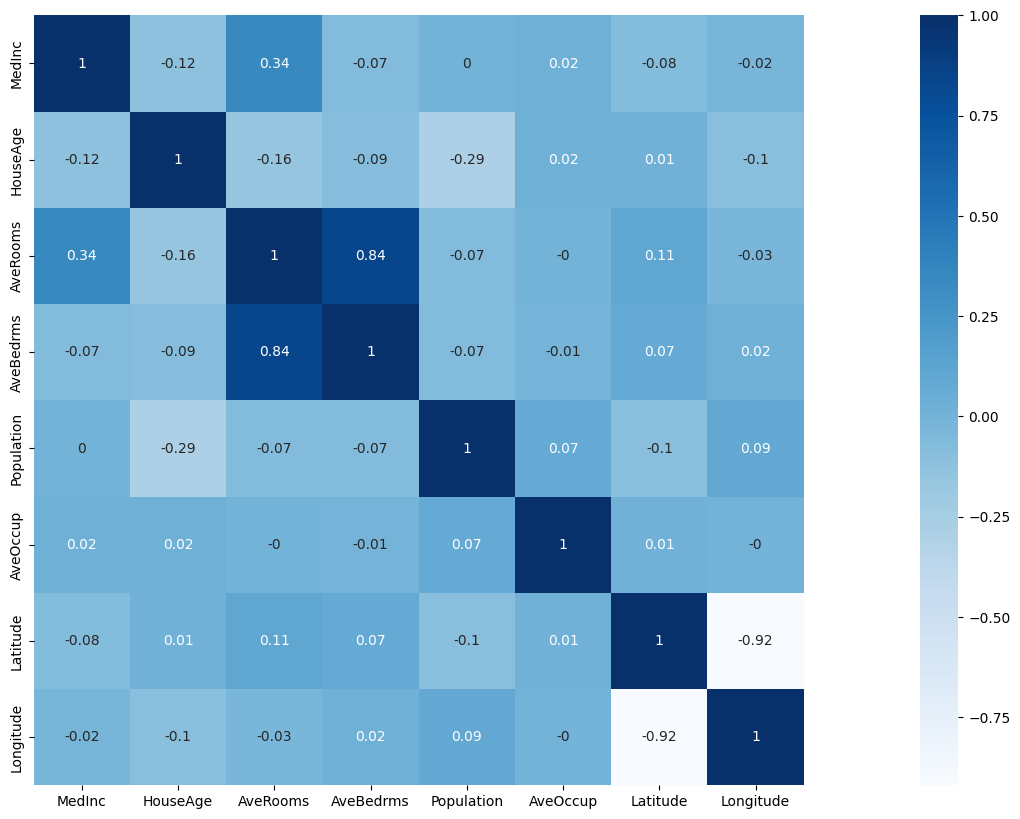

In [21]:
plt.figure(figsize=(30, 10))

correlation_matrix = train_data.corr().round(2)
sns.heatmap(
    data=correlation_matrix, square=True, annot=True, cmap="Blues"
)

In [22]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()

In [23]:
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
coeffcients = pd.DataFrame(
    linear_regressor.coef_, X_train.columns, columns=["Coefficient"]
)

print("Learned intercept: {:.2f}".format(linear_regressor.intercept_))

print("\n--The learned coefficient value learned by the linear regression model--")
print(coeffcients)

Learned intercept: -37.02

--The learned coefficient value learned by the linear regression model--
            Coefficient
MedInc         0.448675
HouseAge       0.009724
AveRooms      -0.123323
AveBedrms      0.783145
Population    -0.000002
AveOccup      -0.003526
Latitude      -0.419792
Longitude     -0.433708


In [25]:
from sklearn.metrics import mean_squared_error

y_pred_train = linear_regressor.predict(X_train)
print("\n--Train MSE--\n{}".format(mean_squared_error(y_train, y_pred_train)))


--Train MSE--
0.5179331255246699


In [27]:
y_pred_test = linear_regressor.predict(X_test)

print("Test MSE: {:.2f}".format(mean_squared_error(y_test, y_pred_test)))

Test MSE: 0.56


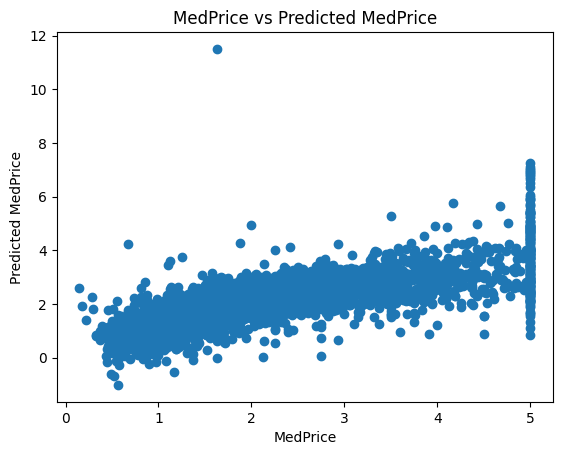

In [28]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("MedPrice")
plt.ylabel("Predicted MedPrice")
plt.title("MedPrice vs Predicted MedPrice")
plt.show()

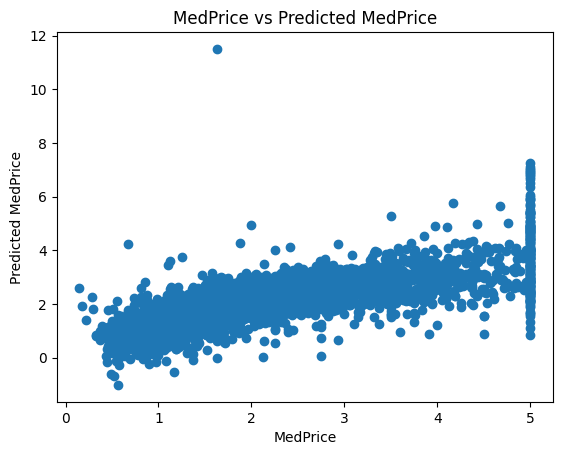

In [29]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("MedPrice")
plt.ylabel("Predicted MedPrice")
plt.title("MedPrice vs Predicted MedPrice")
plt.show()

<ipython-input-30-fb115bec64cf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred_test)


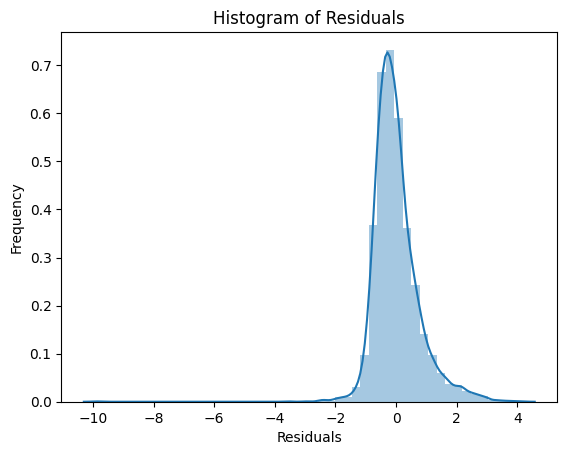

In [30]:
sns.distplot(y_test - y_pred_test)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [31]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [32]:
y_pred_train = tree_regressor.predict(X_train)
y_pred_test = tree_regressor.predict(X_test)

print("Train MSE: {:.2f}".format(mean_squared_error(y_train, y_pred_train)))

print("Test MSE: {:.2f}".format(mean_squared_error(y_test, y_pred_test)))

Train MSE: 0.62
Test MSE: 0.64


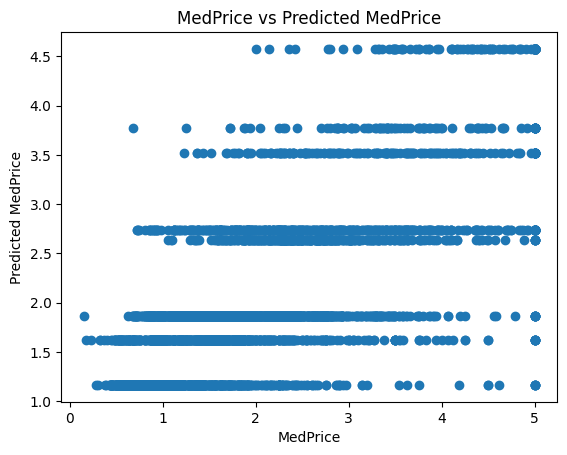

In [33]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("MedPrice")
plt.ylabel("Predicted MedPrice")
plt.title("MedPrice vs Predicted MedPrice")
plt.show()

In [35]:
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

cv_sets = []
for train_index, test_index in kf.split(X_train):
    cv_sets.append(
        (
            X_train.iloc[train_index],
            y_train.iloc[train_index],
            X_train.iloc[test_index],
            y_train.iloc[test_index],
        )
    )

In [36]:
max_depths = list(range(1, 11))

for max_depth in max_depths:
    cv_results = []
    regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
for (
    x_tr,
    y_tr,
    x_te,
    y_te,
) in cv_sets:
    regressor.fit(x_tr, y_tr)
    cv_results.append(mean_squared_error(regressor.predict(x_te), y_te))
print("Tree depth: {}, Avg. MSE: {}".format(max_depth, np.mean(cv_results)))

Tree depth: 10, Avg. MSE: 0.4133081639092951


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

regressor = DecisionTreeRegressor(random_state=42)

hps = {"max_depth": list(range(1, 11))}


scoring_fnc = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(
    estimator=regressor, param_grid=hps, scoring=scoring_fnc, cv=5
)

grid_search = grid_search.fit(X_train, y_train)

0.9167053334390705 {'max_depth': 1}
0.7383634845663013 {'max_depth': 2}
0.6332304763637293 {'max_depth': 3}
0.5709000554444198 {'max_depth': 4}
0.5080051413043611 {'max_depth': 5}
0.4582214929229533 {'max_depth': 6}
0.4261190932474716 {'max_depth': 7}
0.40562709940427394 {'max_depth': 8}
0.40068909059605107 {'max_depth': 9}
0.4133081639092951 {'max_depth': 10}


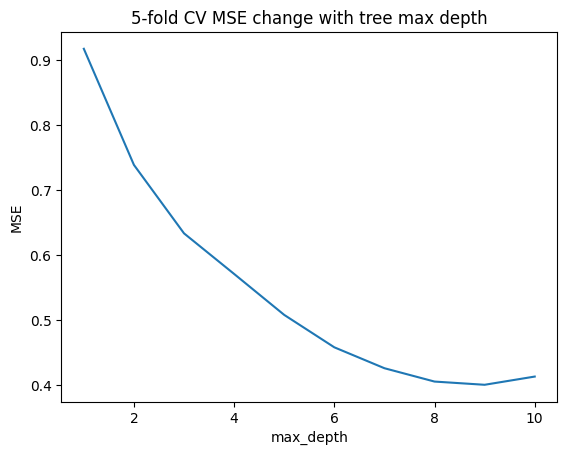

In [38]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

plt.plot(hps["max_depth"], -cvres["mean_test_score"])
plt.title("5-fold CV MSE change with tree max depth")
plt.xlabel("max_depth")
plt.ylabel("MSE")
plt.show()

In [39]:
grid_search.best_params_
best_tree_regressor = grid_search.best_estimator_

print("Best hyperparameter is {}.".format(grid_search.best_params_))

y_pred_train = best_tree_regressor.predict(X_train)
y_pred_test = best_tree_regressor.predict(X_test)

print("\n--Train MSE--\n{}".format(mean_squared_error(y_train, y_pred_train)))

print("\n--Test MSE--\n{}\n".format(mean_squared_error(y_test, y_pred_test)))

Best hyperparameter is {'max_depth': 9}.

--Train MSE--
0.26745519256534417

--Test MSE--
0.4150681340811693



Tree depth: 1, Test MSE: 0.9441349708215669
Tree depth: 2, Test MSE: 0.7542635096031615
Tree depth: 3, Test MSE: 0.6424109810265641
Tree depth: 4, Test MSE: 0.5844045983300754
Tree depth: 5, Test MSE: 0.5245146178314735
Tree depth: 6, Test MSE: 0.4972838079675652
Tree depth: 7, Test MSE: 0.4565857103929165
Tree depth: 8, Test MSE: 0.4220453873628258
Tree depth: 9, Test MSE: 0.4150681340811693
Tree depth: 10, Test MSE: 0.4154681981618525


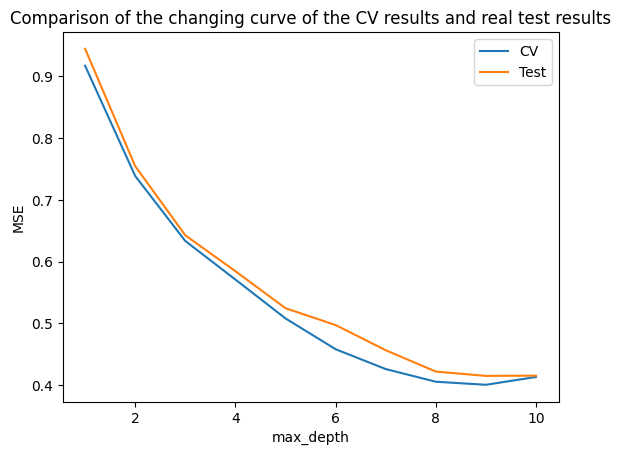

In [40]:
test_results = []
for max_depth in hps["max_depth"]:
    tmp_results = []
    regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    regressor.fit(X_train, y_train)
    test_results.append(mean_squared_error(regressor.predict(X_test), y_test))
    print("Tree depth: {}, Test MSE: {}".format(max_depth, test_results[-1]))

plt.plot(hps["max_depth"], -cvres["mean_test_score"])
plt.plot(hps["max_depth"], test_results)
plt.title("Comparison of the changing curve of the CV results and real test results")
plt.legend(["CV", "Test"])
plt.xlabel("max_depth")
plt.ylabel("MSE")
plt.show()